In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [2]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [3]:
Y = X+10

In [4]:
X_train = X[:40]
X_test =  X[40:]
Y_train = Y[:40]
Y_test = Y[40:]


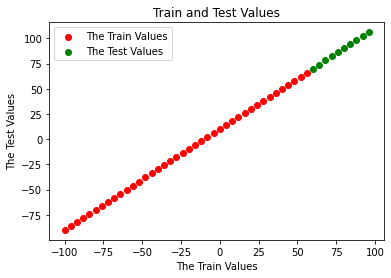

In [5]:
plt.scatter(X_train, Y_train, color='red', label='The Train Values')
plt.scatter(X_test, Y_test, color='green', label='The Test Values')
plt.legend()
plt.title('Train and Test Values')
plt.xlabel('The Train Values')
plt.ylabel('The Test Values')
plt.show()


# Lets Create A model

In [7]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model.fit(tf.expand_dims(X, axis=1),Y,epochs=100)

model.evaluate(X,Y)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 19.0311 - mae: 19.0311
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 10.8111 - mae: 10.8111
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 14.5005 - mae: 14.5005
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 10.0958 - mae: 10.0958
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 15.5388 - mae: 15.5388
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 11.8626 - mae: 11.8626
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1727 - mae: 9.1727
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 13.6143 - mae: 13.6143
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 13.8577 - mae: 13.8577
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 9.9966 - mae: 9.9966
Epoch 11/100
2/2 [==============================] - 0s 4ms/step

[8.629892349243164, 8.629892349243164]

In [8]:
y_pred = model.predict(X_test)


In [9]:
y_pred

array([[54.771534],
       [58.31733 ],
       [61.863125],
       [65.40892 ],
       [68.95471 ],
       [72.50051 ],
       [76.04631 ],
       [79.5921  ],
       [83.1379  ],
       [86.6837  ]], dtype=float32)

In [10]:
y_pred.shape

(10, 1)

In [11]:
y_pred_squeeze =  tf.squeeze(y_pred)

In [12]:
y_pred_squeeze.shape, X_test.shape

(TensorShape([10]), TensorShape([10]))

In [13]:
def plot_prediction(
    train_data = X_train,
    train_label= Y_train,
    test_data = X_test,
    test_label= Y_test,
    predictions = y_pred_squeeze):
  
  plt.scatter(train_data, train_label, color='green', label='The Train Data & Labels')
  plt.scatter(test_data, test_label, color='blue', label='The Test Data & Labels' )
  plt.scatter(test_data, predictions, color='red', label='Predictions With Test Data ')
  plt.legend()
  plt.title('Plot Predictions')
  plt.xlabel('Train Values')
  plt.ylabel('Test Values')
  plt.show()


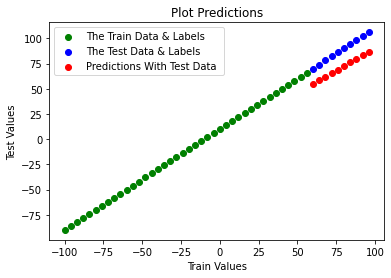

In [14]:
plot_prediction();

In [15]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=Y_test, y_pred=y_pred_squeeze)

In [56]:
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=Y_test, y_pred=y_pred_squeeze)

# **Experiments A Models**

#Model No 1

In [57]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer  = tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_1.fit(tf.expand_dims(X, axis=1), Y, epochs=100)

model_1.evaluate(X,Y)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 19.0311 - mae: 19.0311
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 10.8111 - mae: 10.8111
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 14.5005 - mae: 14.5005
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 10.0958 - mae: 10.0958
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 15.5388 - mae: 15.5388
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8626 - mae: 11.8626
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1727 - mae: 9.1727
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 13.6143 - mae: 13.6143
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 13.8577 - mae: 13.8577
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 9.9966 - mae: 9.9966
Epoch 11/100
2/2 [==============================] - 0s 6ms/st

[8.629892349243164, 8.629892349243164]

In [58]:
y_pred_1 = model_1.predict(X_test)

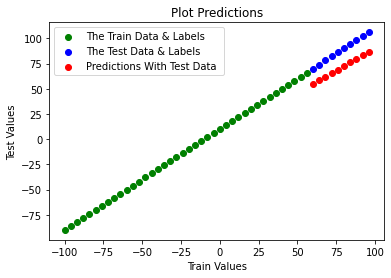

In [59]:
plot_prediction(predictions=y_pred_1)

In [60]:
mae_1 =  mae(Y_test, y_pred_1)


In [61]:
mse_1 = mse(Y_test, y_pred_1)

# Model No 2

In [62]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_2.fit(tf.expand_dims(X,axis=1), Y, epochs=100)

model_2.evaluate(X,Y)


Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 40.2867 - mae: 40.2867
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 25.9297 - mae: 25.9297
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 44.1696 - mae: 44.1696
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 11.2212 - mae: 11.2212
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 23.0317 - mae: 23.0317
Epoch 6/100
2/2 [==============================] - 0s 21ms/step - loss: 24.2563 - mae: 24.2563
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2416 - mae: 11.2416
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 34.1576 - mae: 34.1576
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 12.5246 - mae: 12.5246
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1823 - mae: 10.1823
Epoch 11/100
2/2 [==============================] - 0s 6ms

[17.18813705444336, 17.18813705444336]

In [63]:
y_pred_2 = model_2.predict(X_test)

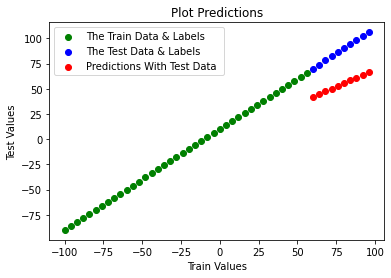

In [64]:
plot_prediction(predictions=y_pred_2)

In [65]:
mae_2 =  mae(Y_test, y_pred_2)

In [66]:
mse_2 = mse(Y_test, y_pred_2)

# Model No 3

In [67]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_3.fit(tf.expand_dims(X,axis=1), Y, epochs=500)

model_3.evaluate(X,Y)


Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 40.2867 - mae: 40.2867
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 25.9297 - mae: 25.9297
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 44.1696 - mae: 44.1696
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 11.2212 - mae: 11.2212
Epoch 5/500
2/2 [==============================] - 0s 21ms/step - loss: 23.0317 - mae: 23.0317
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 24.2563 - mae: 24.2563
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.2416 - mae: 11.2416
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 34.1576 - mae: 34.1576
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 12.5246 - mae: 12.5246
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 10.1823 - mae: 10.1823
Epoch 11/500
2/2 [==============================] - 0s 5ms

[12.38033676147461, 12.38033676147461]

In [68]:
y_pred_3 = model.predict(X_test)

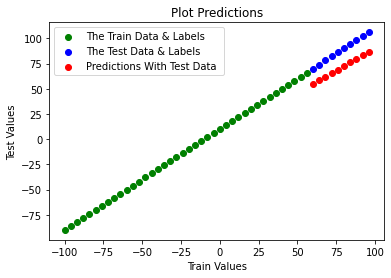

In [69]:
plot_prediction(predictions=y_pred_3)

In [70]:
 mae_3 =  mae(Y_test, y_pred_3)

In [71]:
mse_3 =  mse(Y_test, y_pred_3) 

# **Compairing and Tracking Experiments**

In [72]:
model_result = [
                ['model_1', mae_1.numpy(), mse_1.numpy() ],
                ['model_2', mae_2.numpy(), mse_2.numpy()],
                ['model_3', mae_3.numpy(),mse_3.numpy()]
]

In [73]:
model_result

[['model_1', 17.272385, 300.0373],
 ['model_2', 17.272385, 300.0373],
 ['model_3', 17.272385, 300.0373]]

In [74]:
all_result = pd.DataFrame(model_result, columns=['model', 'mae','mse'])
all_result

,model,mae,mse
0,model_1,17.272385,300.037292
1,model_2,17.272385,300.037292
2,model_3,17.272385,300.037292


# **Saving a Model**

`You can save a model in two different ways`:

1.   **Save Model Format(Using This, You get Complete Folder)** 
2.   **HDF5 Format ( Using this, You can get a Single File)**




 **Using Save Model Format**

In [76]:
model_1.save('My_First_model')

INFO:tensorflow:Assets written to: My_First_model/assets


**Using HD5 Format**

In [77]:
model_2.save('My_second_model.h5')

# **Load A Model**

In [78]:
load_model_1 = tf.keras.models.load_model('/content/My_First_model')

In [79]:
load_model_1.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [82]:
model_1_exist=  model.predict(X_test)
model_1_load = load_model_1.predict(X_test)

model_1_exist == model_1_load

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# Loading A Second Model

In [88]:
load_second_model = tf.keras.models.load_model('/content/My_second_model.h5')

In [89]:
load_second_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [93]:
exist_second_model = model_2.predict(X_test)
load_second_one_model = load_second_model.predict(X_test)


In [94]:
exist_second_model.squeeze() == load_second_one_model.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [96]:
from google.colab import files

files.download('/content/My_second_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>